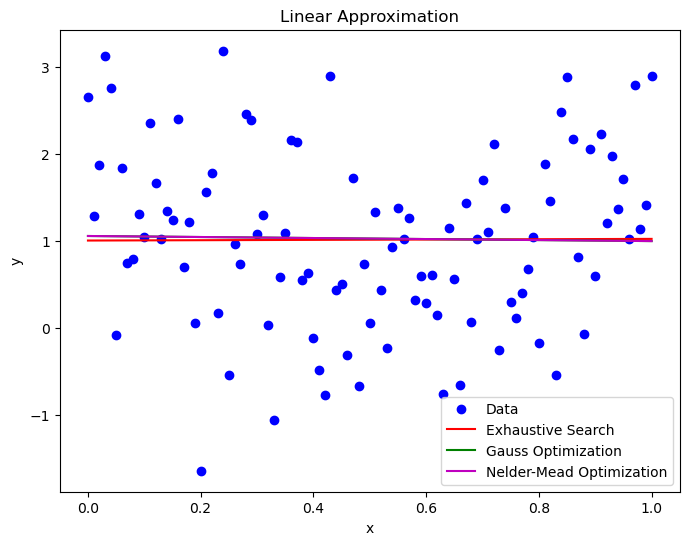

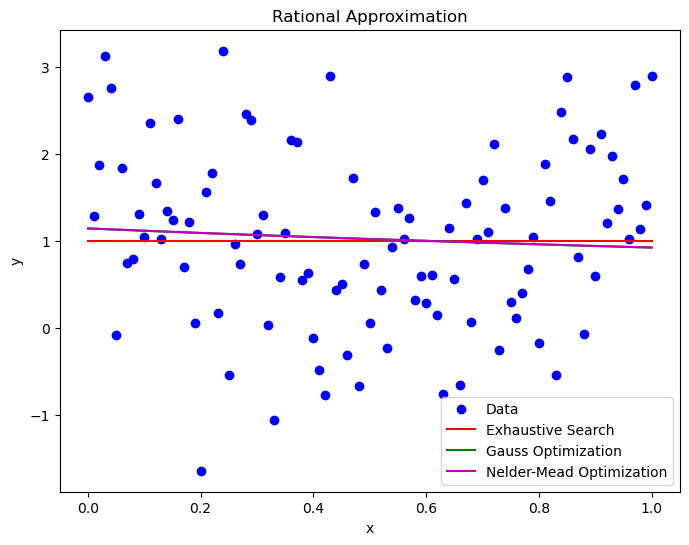

Linear Approximation:
Exhaustive Search - Parameters: (0.01901901901901902, 1.0)
Exhaustive Search - Loss: 104.64944002675269
Gauss Optimization - Parameters: [-0.05860936  1.05222606]
Gauss Optimization - Loss: 104.579537656481
Gauss Optimization - Iterations: 3
Gauss Optimization - Evaluations: 78
Nelder-Mead Optimization - Parameters: [-0.05862204  1.0522417 ]
Nelder-Mead Optimization - Loss: 104.57953766659952
Nelder-Mead Optimization - Iterations: 42
Nelder-Mead Optimization - Evaluations: 83

Rational Approximation:
Exhaustive Search - Parameters: (1.0, 0.0)
Exhaustive Search - Loss: 104.6620919965526
Gauss Optimization - Parameters: [1.13933574 0.23904046]
Gauss Optimization - Loss: 104.49715170398457
Gauss Optimization - Iterations: 3
Gauss Optimization - Evaluations: 72
Nelder-Mead Optimization - Parameters: [1.13913288 0.23911991]
Nelder-Mead Optimization - Loss: 104.49714745386338
Nelder-Mead Optimization - Iterations: 43
Nelder-Mead Optimization - Evaluations: 84


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate random numbers alpha and beta
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

# Generate noisy data
np.random.seed(0)
x = np.linspace(0, 1, 101)
delta = np.random.randn(101)
y = alpha * x + beta + delta

# Define linear approximant function
def linear_approximant(x, a, b):
    return a * x + b

# Define rational approximant function
def rational_approximant(x, a, b):
    return a / (1 + b * x)

# Define objective function for least squares
def objective_function(params, x, y, approximant_func):
    a, b = params
    y_pred = approximant_func(x, a, b)
    return np.sum((y_pred - y) ** 2)

# Perform exhaustive search
def exhaustive_search(approximant_func):
    best_params = None
    best_loss = float('inf')
    num_evaluations = 0

    for a in np.linspace(0, 1, 1000):
        for b in np.linspace(0, 1, 1000):
            params = (a, b)
            loss = objective_function(params, x, y, approximant_func)
            num_evaluations += 1

            if loss < best_loss:
                best_loss = loss
                best_params = params

    return best_params, best_loss, num_evaluations

# Perform optimization using Gauss (Gaussian) method
def gauss_optimization(approximant_func):
    initial_guess = [0.5, 0.5]
    result = minimize(objective_function, initial_guess, args=(x, y, approximant_func), method='Powell')
    best_params = result.x
    best_loss = result.fun
    num_iterations = result.nit
    num_evaluations = result.nfev

    return best_params, best_loss, num_iterations, num_evaluations

# Perform optimization using Nelder-Mead method
def nelder_mead_optimization(approximant_func):
    initial_guess = [0.5, 0.5]
    result = minimize(objective_function, initial_guess, args=(x, y, approximant_func), method='Nelder-Mead')
    best_params = result.x
    best_loss = result.fun
    num_iterations = result.nit
    num_evaluations = result.nfev

    return best_params, best_loss, num_iterations, num_evaluations

# Perform exhaustive search for linear approximant
linear_params_exhaustive, linear_loss_exhaustive, linear_evaluations_exhaustive = exhaustive_search(linear_approximant)

# Perform optimization using Gauss (Gaussian) method for linear approximant
linear_params_gauss, linear_loss_gauss, linear_iterations_gauss, linear_evaluations_gauss = gauss_optimization(linear_approximant)

# Perform optimization using Nelder-Mead method for linear approximant
linear_params_nelder_mead, linear_loss_nelder_mead, linear_iterations_nelder_mead, linear_evaluations_nelder_mead = nelder_mead_optimization(linear_approximant)

# Perform exhaustive search for rational approximant
rational_params_exhaustive, rational_loss_exhaustive, rational_evaluations_exhaustive = exhaustive_search(rational_approximant)

# Perform optimization using Gauss (Gaussian) method for rational approximant
rational_params_gauss, rational_loss_gauss, rational_iterations_gauss, rational_evaluations_gauss = gauss_optimization(rational_approximant)

# Perform optimization using Nelder-Mead method for rational approximant
rational_params_nelder_mead, rational_loss_nelder_mead, rational_iterations_nelder_mead, rational_evaluations_nelder_mead = nelder_mead_optimization(rational_approximant)

# Visualize the data and the approximations for linear approximant
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, linear_approximant(x, *linear_params_exhaustive), 'r-', label='Exhaustive Search')
plt.plot(x, linear_approximant(x, *linear_params_gauss), 'g-', label='Gauss Optimization')
plt.plot(x, linear_approximant(x,*linear_params_nelder_mead), 'm-', label='Nelder-Mead Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Approximation')
plt.legend()
plt.show()

# Visualize the data and the approximations for rational approximant
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, rational_approximant(x, *rational_params_exhaustive), 'r-', label='Exhaustive Search')
plt.plot(x, rational_approximant(x, *rational_params_gauss), 'g-', label='Gauss Optimization')
plt.plot(x, rational_approximant(x, *rational_params_nelder_mead), 'm-', label='Nelder-Mead Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rational Approximation')
plt.legend()
plt.show()

# Print the results
print('Linear Approximation:')
print('Exhaustive Search - Parameters:', linear_params_exhaustive)
print('Exhaustive Search - Loss:', linear_loss_exhaustive)
print('Gauss Optimization - Parameters:', linear_params_gauss)
print('Gauss Optimization - Loss:', linear_loss_gauss)
print('Gauss Optimization - Iterations:', linear_iterations_gauss)
print('Gauss Optimization - Evaluations:', linear_evaluations_gauss)
print('Nelder-Mead Optimization - Parameters:', linear_params_nelder_mead)
print('Nelder-Mead Optimization - Loss:', linear_loss_nelder_mead)
print('Nelder-Mead Optimization - Iterations:', linear_iterations_nelder_mead)
print('Nelder-Mead Optimization - Evaluations:', linear_evaluations_nelder_mead)

print('\nRational Approximation:')
print('Exhaustive Search - Parameters:', rational_params_exhaustive)
print('Exhaustive Search - Loss:', rational_loss_exhaustive)
print('Gauss Optimization - Parameters:', rational_params_gauss)
print('Gauss Optimization - Loss:', rational_loss_gauss)
print('Gauss Optimization - Iterations:', rational_iterations_gauss)
print('Gauss Optimization - Evaluations:', rational_evaluations_gauss)
print('Nelder-Mead Optimization - Parameters:', rational_params_nelder_mead)
print('Nelder-Mead Optimization - Loss:', rational_loss_nelder_mead)
print('Nelder-Mead Optimization - Iterations:', rational_iterations_nelder_mead)
print('Nelder-Mead Optimization - Evaluations:', rational_evaluations_nelder_mead)